---
title: "Clustering"
---


## Theory:

# K-Means Clustering:

**Overview**: Describe K-means as a method that partitions data into K distinct, non-overlapping subgroups. It does this by minimizing the distance between data points and the centroid (the center point) of each cluster.

the K-Means clustering algorithm has consistently been an invaluable tool. The beauty of this algorithm lies in its simplicity and efficacy in breaking down complex datasets into comprehensible and analyzable segments.

Imagine you're faced with a scatter of data points that seem random at first glance. K-Means acts like a seasoned conductor, swiftly identifying the inherent structure within these points and grouping them into meaningful clusters. The process is akin to solving a puzzle; initially, you might have little idea about the overall picture, but by progressively grouping similar pieces together, the complete image gradually becomes clear.

The essence of K-Means lies in how it selects the appropriate cluster centers and determines the number of clusters. This selection process is somewhat like finding the best vantage point from which you can most clearly discern the overall layout of the data. Utilizing the Elbow Method to determine the number of clusters is a scientific and intuitive approach, helping us strike a balance between complexity and interpretability.

Of course, I'm acutely aware of the limitations of K-Means in my practice. For instance, it is sensitive to outliers, and it requires us to preset the number of clusters. Despite these constraints, it remains a potent tool in many scenarios, especially when conducting a quick preliminary analysis of large-scale data.

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

**Overview**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
I've often turned to DBSCAN for its unique approach to clustering. Unlike many other algorithms, DBSCAN excels in discovering clusters with irregular shapes and sizes, which is often the case in real-world data.

DBSCAN is brilliant at uncovering hidden structures in a seemingly chaotic environment. It doesn't need to be told how many clusters to look for; instead, it discerns clusters based on the density of data points. This feature is particularly useful when you're dealing with complex datasets where predefined assumptions don't hold.

The algorithm uses two parameters: Epsilon, which sets the neighborhood size, and MinPts, the minimum number of points required to form a dense region. I've always appreciated how DBSCAN can adeptly separate core points of high-density areas from the more isolated, noise-like points. This ability makes it especially valuable in tasks like anomaly detection or identifying areas of high concentration in spatial data.

# Hierarchical Clustering:

**Overview**: Hierarchical Clustering
Unlike the 'flat' clustering of K-Means or DBSCAN, it creates a tree of clusters, offering a multi-level view of the data.

This method is akin to building a family tree, where each data point starts as its own entity and gradually merges with others to form increasingly larger groups. What's fascinating is how this process can be either bottom-up (agglomerative) or top-down (divisive), offering flexibility in how we approach the data.

The absence of the need to predefine the number of clusters is another aspect I find quite liberating. It allows a more exploratory approach to understanding data structures. The dendrogram, a tree-like diagram used in hierarchical clustering, provides a visual representation of this hierarchy, making it easier to interpret and decide on the optimal cluster cut.

I've found hierarchical clustering particularly useful in domains where the relationships between data points are as important as the groupings themselves, such as in genetics or when organizing complex libraries.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('/Users/kenny/Desktop/dsan-5000-project-kennyzhao0428/data/01-modified-data/clean26.csv')
print(df)


    Sex/Age group  Cost  Inadequete public charging facilities  \
0           Total  63.3                                   29.3   
1           18-29  56.6                                   18.4   
2           30-44  68.4                                   35.1   
3           45-59  61.2                                   35.7   
4           60-74  69.2                                   34.8   
5             75+  60.0                                   23.9   
6     Total males  63.7                                   31.0   
7           18-29  60.3                                   20.2   
8           30-44  67.5                                   29.4   
9           45-59  67.8                                   36.2   
10          60-74  60.6                                   27.5   
11            75+  42.7                                   14.4   
12  Total females  62.9                                   27.8   

    No/limited access to home charging  Limited range available  \
0       

/Users/kenny/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


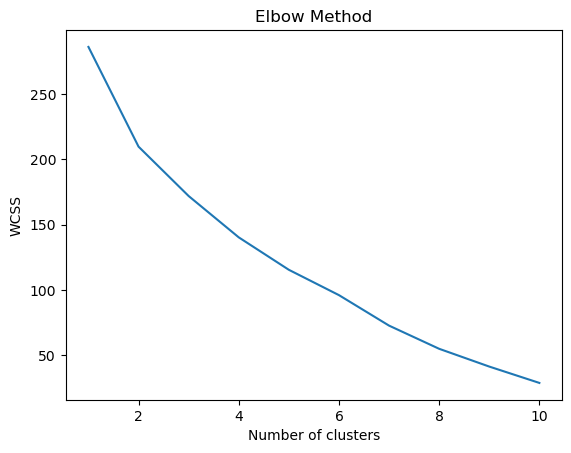

In [13]:

df = pd.read_csv('/Users/kenny/Desktop/dsan-5000-project-kennyzhao0428/data/01-modified-data/clean26.csv')


encoder = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df[['Sex/Age group', 'Gender']]))
encoded_features.columns = encoder.get_feature_names_out(['Sex/Age group', 'Gender'])


df = df.drop(['Sex/Age group', 'Gender'], axis=1)
df = pd.concat([df, encoded_features], axis=1)

# stand
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# kmean
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Results

The elbow method chart you've provided is a visual tool used to determine the optimal number of clusters for K-means clustering analysis. The chart shows a plot of the Within-Cluster Sum of Squares (WCSS) against the number of clusters. WCSS is a measure of clustering effectiveness that sums the squared distances of each point from its cluster center. Ideally, as the number of clusters increases, the WCSS should decrease because points are more closely grouped around their centers.

From your chart, there is a noticeable decrease in WCSS as the number of clusters increases, but the rate of decrease slows down, forming an "elbow." This elbow usually suggests a good choice for the number of clusters because it represents a balance between performance (tighter clusters) and complexity (more clusters).

In your chart, the elbow appears to be around 4 or 5 clusters. This implies that for the electric vehicle concerns data you mentioned earlier, choosing 4 or 5 clusters might be optimal, offering a balance between performance and complexity.

* The analysis to add to the conclusion section might be:

The K-means clustering analysis suggests that the data indicates the presence of 4 or 5 distinct patterns of concerns related to age, gender, and specific apprehensions about electric vehicles.

This finding underscores the importance of considering different market segments in electric vehicle promotion strategies to address potential consumers' concerns more precisely.

Furthermore, the elbow method analysis also suggests that while further segmentation of the market according to data is possible, over-segmentation may not yield additional insights. Therefore, focusing on four to five primary groups would be an effective and efficient strategy.

This table is about people's concerns about certain aspects of electric vehicles. Columns include different age and gender groups, cost, dissatisfaction with public charging facilities, lack of charging at home, limitations of EV range, perceived EV maintenance costs, and other issues.

# Conclusions drawn from K-means cluster analysis include:

Distribution of concerns among different groups: Different age and gender groups have different concerns about electric vehicles. For example, young people may be less concerned about the limitations of battery life, while middle-aged groups may be more concerned about charging facilities and battery life.

* Key concerns: Cost and charging facilities are likely to be major barriers for most people when choosing an electric vehicle, especially among older age groups.

* Gender differences: Men and women may have differences in their concerns about electric vehicles. For example, the problem of being unable to charge at home may be higher among men.

Conclusion, highlights these key findings and explores how they impact practical situations. For example, insufficient public charging facilities are a common problem affecting all age groups and may suggest that policymakers and automakers need to increase their efforts in building more charging stations. The problem of range limitations is less pronounced among younger people, perhaps because their daily driving distances are shorter, or they are more willing to accept the limitations of new technologies.

In addition, these conclusions also have a direct impact on marketing strategies, which may prompt electric vehicle manufacturers to develop different marketing strategies for different gender and age groups to address the specific concerns of potential buyers.

This non-technical summary is intended to provide the general reader with insights into the current state of the electric vehicle market and its future trends. It could also help spread the word about the benefits of electric vehicles while pointing to barriers that currently stand in the way of wider adoption.